<h1> Übung 1: Nichtlineare Ausgleichsrechnung </h1>
<b>Wiederholung:</b> <br />
1. 2-D Datenpunkte Erstellen  <br />
2. Funktion der Ellipse für die Ausgleichsrechnung definieren <br />
3. Nichtlineare Ausgleichsrechnung anwenden <br />
4. Berechnete Ellipse Anzeigen <br />

<b>Übung:</b> <br />
5. Lesen und Darstellen eines Bildes <br />
6. Punkte auf einem Kreis im Bild finden **TODO** <br />
7. Residuengleichung für Kreis aufstellen **TODO** <br />
8. Nichtlineares Ausgleichsverfahren anwenden / Berechnung der Kreisgleichung **TODO** <br />
9. Berechneten Kreis im Bild anzeigen <br />

In [4]:
# Import Numpy for numerical operations, alias 'np' in code below
# Import Matplotlib to plot the lines
# Import curve_fit method ffrom Scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from math import pi
import cv2

## 1. 2-D Datenpunkte Erstellen
**Function: <br>** f(a, b, c) : yi = (a * (xi^2)) + (b * xi) + c <br>
2-D datapoints di = (xi,yi)

In [5]:
# Define the required function for curve fitting, here, ellipse

#params: r1, r2, z1, z2
def ellipse_residual(params, x, y):
    return 1 - np.sqrt((x-params[2])**2/params[0]**2 + (y-params[3])**2/params[1]**2)

def ellipse(x, r1, r2, z1, z2):
    return z2 - (r2*np.sqrt(r1**2-z1**2+2*z1*x-x**2))/r1



(-0.05, 1.05, -3.195, 3.295)

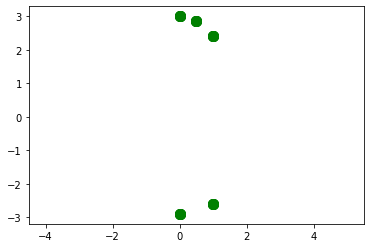

In [6]:
# Given datapoints
data = np.matrix([[1, 2.4], [1, -2.6], [0, 3], [0, -2.9], [0.5, 2.85]])



# Plot given data points to get an initial overview
for i in range(len(data)):
    plt.scatter(np.ravel(data[:,0]), np.ravel(data[:,1]), s=100, facecolors='g', edgecolors='g')
plt.axis('equal')

## 2. Funktion für die Ausgleichsrechnung definieren

In [7]:
# Define initial function parameters of the unknowns 
ini_r1 = 1.9
ini_r2 = 3.2
ini_z1 = 0
ini_z2 = 0
ini = np.array([ini_r1, ini_r2, ini_z1, ini_z2])

(-0.05, 1.05, -3.5100000000000002, 3.31)

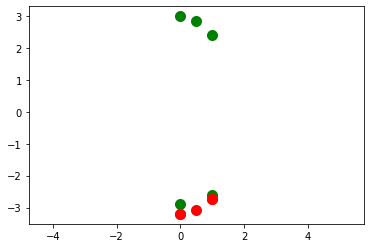

In [8]:
# Get the initial fit using the function parameters
ini_fit_y = np.zeros(len(data))
for i in range(0, len(data)):
    ini_fit_y[i] = ellipse(data[i,0], ini_r1, ini_r2, ini_z1, ini_z2)
  

# Plot the initial fit and original data points
plt.scatter(np.ravel(data[:,0]), np.ravel(data[:,1]), s=100, facecolors='g', edgecolors='g')
plt.scatter(np.ravel(data[:,0]), ini_fit_y, s=100, facecolors='r', edgecolors='r')
plt.axis('equal')

## 3. Nichtlineare Ausgleichsrechnung anwenden

In [9]:
# Use curve_fit method to perform curve fitting for given dataset
out = leastsq(ellipse_residual, ini, args=(np.ravel(data[:,0]), np.ravel(data[:,1])))
out_r1 = out[0][0]
out_r2 = out[0][1]
out_z1 = out[0][2]
out_z2 = out[0][3]
print(out_r1)
print(out_r2)
print(out_z1)
print(out_z2)

1.716666111195664
2.956835937662615
0.08130534757909617
-0.013632648762612175


# 4. Berechnete Ellipse Anzeigen

(-1.8874252402545604, 1.88828950888377, -3.5100000000000002, 3.31)

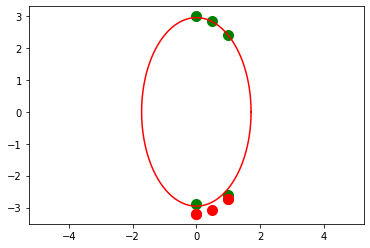

In [10]:
# calculate fitted points
final_fit_y = np.zeros(len(data))
for i in range(0, len(data)):
    final_fit_y[i] = ellipse(data[i,0], ini_r1, ini_r2, ini_z1, ini_z2)


# Plot the original data-points in green
plt.scatter(np.ravel(data[:,0]), np.ravel(data[:,1]), s=100, facecolors='g', edgecolors='g')

# Plot the fitted data points in red
plt.scatter(np.ravel(data[:,0]), final_fit_y, s=100, facecolors='r', edgecolors='r')


# Plot fitted ellipse
t = np.linspace(0,2*pi,100)
plt.plot(out_r1*np.cos(t), out_r2*np.sin(t), 'red')
plt.axis('equal')

## 5.  Lesen und Darstellen eines Bildes

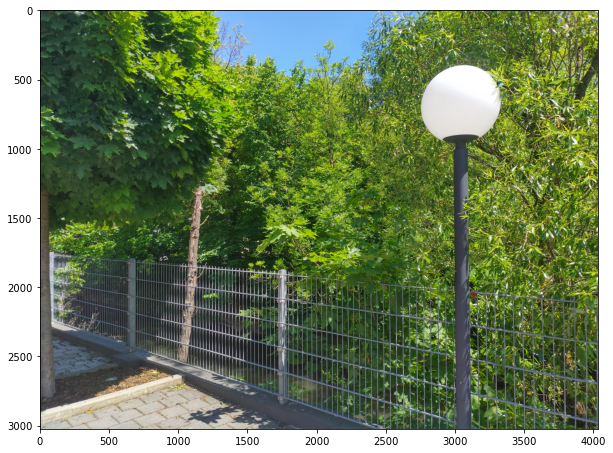

In [11]:
#read image
image = cv2.imread('Kreisbild.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(image)

### 6. Punkte auf einem Kreis im Bild finden **TODO**
Laden Sie das Bild von Moodle herunter und öffnen Sie es in einem Bildbearbeitungsprogramm (z.B. Paint)
Wenn Sie mit der Maus über das Bild fahren, können Sie die Koordinaten einzelner Punkte auslesen.
Wählen Sie einige Punkte entlang eines Kreises im Bild aus und notieren Sie sich die Koordinaten in der folgenden Matrix.

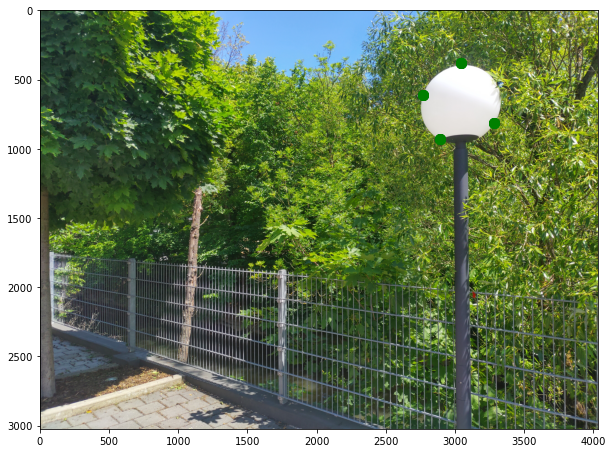

In [12]:
# Given datapoints
data = np.matrix([[3045, 379], [2771, 609], [3282, 815], [2893, 929]]) #TODO


# Plot given data points to get an initial overview
plt.imshow(image)
for i in range(len(data)):
  plt.scatter(np.ravel(data[:,0]), np.ravel(data[:,1]), s=100, facecolors='g', edgecolors='g')

### 7. Residuengleichung für Kreis aufstellen **TODO**
Stellen Sie die Residuengleichung für einen Kreis auf. Die Kreisfunktion lautet: (x-z1)^2 + (x-z2)^2 = r2

In [13]:
def circle_residual(params, x, y):
    return params[0] - np.sqrt((x-params[1])**2 + (y-params[2])**2) #((x, params[0])**2 + (y-params[1]**2))  #TODO (x-z1)^2 + (y-z2)^2 = r2

def circle_eq(x, r, z1, z2):
    return z2-np.sqrt(-z1**2 + 2*z1*x + r**2 - x**2)

### 8. Nichtlineares Ausgleichsverfahren anwenden / Berechnung der Kreisgleichung **TODO**
Berechnen Sie im folgenden die Parameter r, z1 und z2 der Kreisgleichung.

In [18]:
# Define initial function parameters of the unknowns a and b
init_r = 800 #TODO # 300
init_z1 = 1100 #TODO # 3100
init_z2 = 300 #TODO # 300
init_guess = np.array([init_r, init_z1, init_z2])

#TODO: calculate fitted parameteres
out=leastsq(circle_residual, init_guess, args=(np.ravel(data[:,0]), np.ravel(data[:,1])))
final_r = out[0][0] #TODO
final_z1 = out[0][1] #TODO
final_z2 = out[0][2] #TODO
print(final_r)
print(final_z1)
print(final_z2)

286.6427163159218
3040.298359072402
672.619618901092


### 9. Berechneten Kreis im Bild anzeigen

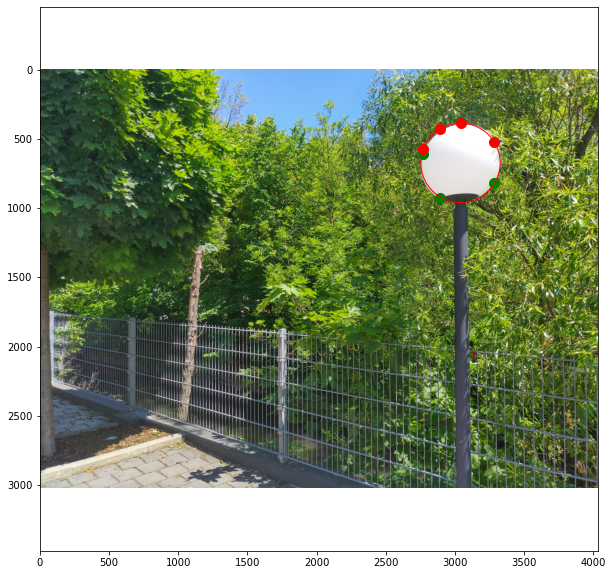

In [19]:
# Fit the curve for a range of x-values (-4,4)
final_fit_y = np.zeros(len(data))


for i in range(0,len(final_fit_y)):
    final_fit_y[i] = circle_eq(np.ravel(data[i,0]), final_r, final_z1, final_z2)

#show image
plt.imshow(image)

# Plot the original data-points in green
plt.scatter(np.ravel(data[:,0]), np.ravel(data[:,1]), s=100, facecolors='g', edgecolors='g')

# Plot the fitted data points in red
plt.scatter(np.ravel(data[:,0]), final_fit_y, s=100, facecolors='r', edgecolors='r')

#plot fitted circle
circle = plt.Circle((final_z1, final_z2), radius=final_r,  fc='none', ec='r')
plt.gca().add_patch(circle)
plt.axis('equal')
plt.show()